**MXNet Deep Learning Framework**

1. Install and Import the necessary Libraries

In [1]:
!pip install mxnet
import mxnet as mx
from mxnet import gluon, autograd, nd
from graphviz import Digraph
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


2. Define the neural network model

In [2]:
# Define the neural network model
neurons = 5
net = gluon.nn.Sequential()
with net.name_scope():
    net.add(gluon.nn.Dense(neurons, activation='relu'))
    net.add(gluon.nn.Dense(1))

3. Model Data Initialization



In [3]:
# Load the data set
iris = load_iris()
data = nd.array(iris.data)

# Normalize the data
data_mean = nd.mean(data, axis=0)
data -= data_mean
data /= nd.sqrt(nd.mean(nd.square(data)))

labels = nd.array(iris.target)

# Define the neural network model
net = gluon.nn.Sequential()
with net.name_scope():
    net.add(gluon.nn.Dense(5, activation='relu'))
    net.add(gluon.nn.Dense(1))
    
# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.8)

# Initialize the model parameters
net.collect_params().initialize(mx.init.Normal(sigma=0.1))

# Define the loss function
loss = gluon.loss.L2Loss()

# Define the optimizer
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

4. Model Framwework Training and Evaluation

In [4]:
# Train the model
for epoch in range(500):
    with autograd.record():
        output = net(train_data)
        L = loss(output, train_labels)
    L.backward()
    trainer.step(train_data.shape[0])
    print('Epoch %d, training loss: %f' % (epoch, mx.nd.mean(L).asscalar()))

# Evaluate the model on the testing set
for epoch in range(500):
    test_output = net(test_data)
    test_loss = loss(test_output, test_labels)
    print('Epoch %d, testing loss: %f' % (epoch, mx.nd.mean(test_loss).asscalar()))

Epoch 0, training loss: 0.615210
Epoch 1, training loss: 0.552628
Epoch 2, training loss: 0.500353
Epoch 3, training loss: 0.455807
Epoch 4, training loss: 0.416975
Epoch 5, training loss: 0.382424
Epoch 6, training loss: 0.351029
Epoch 7, training loss: 0.321935
Epoch 8, training loss: 0.294581
Epoch 9, training loss: 0.268609
Epoch 10, training loss: 0.243845
Epoch 11, training loss: 0.220247
Epoch 12, training loss: 0.197894
Epoch 13, training loss: 0.176927
Epoch 14, training loss: 0.157510
Epoch 15, training loss: 0.139777
Epoch 16, training loss: 0.123821
Epoch 17, training loss: 0.109668
Epoch 18, training loss: 0.097281
Epoch 19, training loss: 0.086552
Epoch 20, training loss: 0.077265
Epoch 21, training loss: 0.069385
Epoch 22, training loss: 0.062754
Epoch 23, training loss: 0.057219
Epoch 24, training loss: 0.052635
Epoch 25, training loss: 0.048868
Epoch 26, training loss: 0.045794
Epoch 27, training loss: 0.043302
Epoch 28, training loss: 0.041292
Epoch 29, training loss:

5. Neural Network Model Visualization

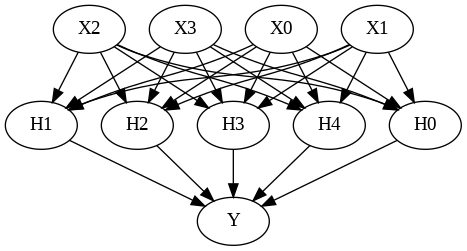

In [5]:
# Create a Digraph object
dot = Digraph()

# Add the input nodes
for i in range(4):
    dot.node('X%d' % i, label='X%d' % i)

# Add the hidden layer nodes
for i in range(neurons):
    dot.node('H%d' % i, label='H%d' % i, shape='ellipse')

# Add the output node
dot.node('Y', label='Y')

# Add the edges between the input and hidden layer nodes
for i in range(4):
    for j in range(neurons):
        dot.edge('X%d' % i, 'H%d' % j)

# Add the edges between the hidden layer and output nodes
dot.edge('H0', 'Y')
for i in range(1, neurons):
    dot.edge('H%d' % i, 'Y')
    
# Render the graph as a PNG file
dot.format = 'png'
dot.render('neural_network')

# Display the PNG file
from IPython.display import Image
Image(filename='neural_network.png')